# **Importing libraries**

In [2]:
!pip install matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


 # **Loading data**

In [3]:
df = pd.read_csv('Data_Weight.csv')

## **EDA**

In [4]:
df.head()

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [5]:
df.tail()

,weight,price
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  7 non-null      int64
 1   price   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [7]:
df.describe()

,weight,price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


# **Slope and Intercept by Manually**

In [8]:
x = df['weight']
y = df['price']

mean_x = np.mean(x)
mean_y = np.mean(y)

In [9]:
mean_x

np.float64(4.571428571428571)

In [10]:
mean_y

np.float64(47.142857142857146)

In [11]:
devi_x = x - mean_x
devi_y = y - mean_y

# Slope 

m = np.sum(devi_x*devi_y)/np.sum(devi_x**2)

#  Intercept(c)

c = mean_y - m*mean_x

print('m =',m)
print('c =',c)



m = 2.620967741935484
c = 35.16129032258065


# **Predict price for weight(x) = 6.5**

In [12]:
prediet_price = m*6.5 + c
print('prediet_price  :',prediet_price)

prediet_price  : 52.197580645161295


# **Linear Regression with SKlearn**

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(df[['weight']],df['price'])

LinearRegression()

lr.coef_

In [15]:
lr.intercept_

np.float64(35.16129032258065)

In [16]:
# pridicated price(for weight = 6.5 ))
lr.coef_ *6.5 + lr.intercept_

array([52.19758065])

# **Visualizing of Linear Regression Model Training Best Fit Line**


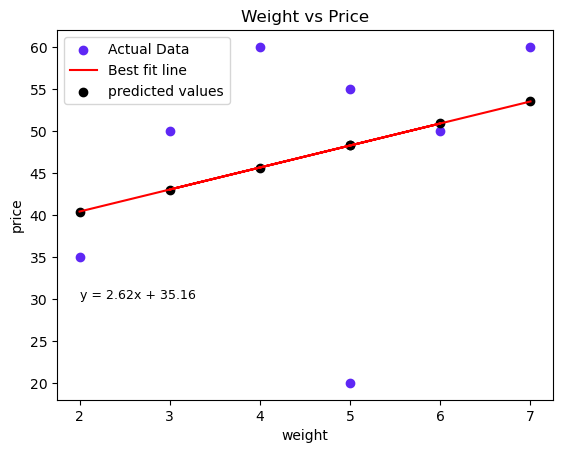

In [21]:

m = lr.coef_[0]
c = lr.intercept_

equ = f"y = {float(m):.2f}x + {float(c):.2f}"
plt.text(min(df['weight']),max(df['price'])-30,equ,fontsize=9,color='black')

 


plt.scatter(df['weight'] ,df['price'],color = '#5E27F5',marker = 'o',label = 'Actual Data')

plt.plot(df[['weight']],lr.predict(df[['weight']]),color = 'red',label = 'Best fit line')
plt.scatter(df[['weight']] ,lr.predict(df[['weight']]) , color='black', marker='o',label= 'predicted values')

plt.xlabel('weight')
plt.ylabel('price')
plt.title('Weight vs Price')

plt.legend()
plt.show()